In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [2]:
# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df22 = pd.read_fwf('./Dados/COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df23 = pd.read_fwf('./Dados/COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df22 = df22[df22['Codigo'].str.endswith('VALE3')]
vale3_df23 = df23[df23['Codigo'].str.endswith('VALE3')]

print(vale3_df22)
print(vale3_df23)

# Convertendo a coluna 'Data' para datetime
vale3_df22['Data'] = pd.to_datetime(vale3_df22['Data'], format='%Y%m%d')
vale3_df23['Data'] = pd.to_datetime(vale3_df23['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
vale3_df22['Ano'] = vale3_df22['Data'].dt.year
vale3_df22['Mes'] = vale3_df22['Data'].dt.month
vale3_df22['Dia'] = vale3_df22['Data'].dt.day

vale3_df23['Ano'] = vale3_df23['Data'].dt.year
vale3_df23['Mes'] = vale3_df23['Data'].dt.month
vale3_df23['Dia'] = vale3_df23['Data'].dt.day


print(vale3_df22)
print(vale3_df23)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
72       20220203  02VALE3          8630.0            8532.0
786      20220103  02VALE3          7900.0            7800.0
3067     20220221  02VALE3          8660.0            8550.0
3131     20220119  02VALE3          8848.0            8788.0
6517     20220204  02VALE3          8575.0            8555.0
...           ...      ...             ...               ...
1231752  20221117  02VALE3          8087.0            8074.0
1231786  20221103  02VALE3          6764.0            6658.0
1232530  20221201  02VALE3          8642.0            8473.0
1234320  20221124  02VALE3          8151.0            8061.0
1234594  20221027  02VALE3          7200.0            6943.0

[250 rows x 4 columns]
             Data   Codigo  Preco_Abertura  Preco_Fechamento
323      20230102  02VALE3          8868.0            8853.0
1766     20230103  02VALE3          8940.0            8889.0
3238     20230104  02VALE3          8930.0            8794.0


C:\Users\victo\AppData\Local\Temp\ipykernel_11424\1988719624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df22['Data'] = pd.to_datetime(vale3_df22['Data'], format='%Y%m%d')
C:\Users\victo\AppData\Local\Temp\ipykernel_11424\1988719624.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df23['Data'] = pd.to_datetime(vale3_df23['Data'], format='%Y%m%d')
C:\Users\victo\AppData\Local\Temp\ipykernel_11424\1988719624.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


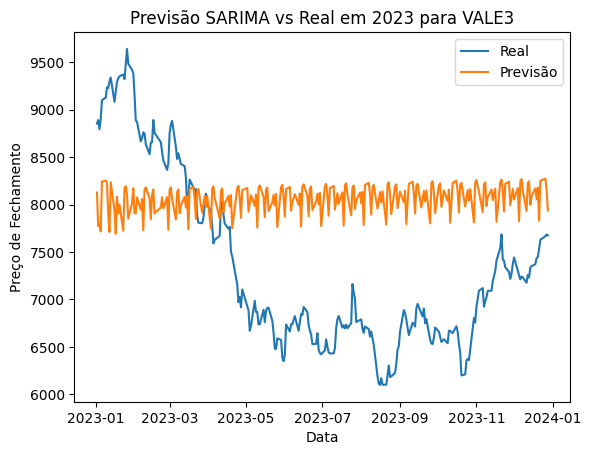

Erro quadrático médio (MSE) das previsões:  1443000.6470844424


In [4]:
# Treinamento do modelo SARIMA usando os dados de 2022
modelo_sarima = SARIMAX(vale3_df22['Preco_Fechamento'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
resultado = modelo_sarima.fit()

# Fazendo previsões para 2023
previsoes_2023 = resultado.get_forecast(steps=len(vale3_df23))
previsoes_2023_mean = previsoes_2023.predicted_mean

# Visualização das previsões
plt.plot(vale3_df23['Data'], vale3_df23['Preco_Fechamento'], label='Real')
plt.plot(vale3_df23['Data'], previsoes_2023_mean, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão SARIMA vs Real em 2023 para VALE3')
plt.legend()
plt.show()

# Avaliação do modelo
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(vale3_df23['Preco_Fechamento'], previsoes_2023_mean)
print('Erro quadrático médio (MSE) das previsões: ', mse)
